<a href="https://colab.research.google.com/github/Ksenyff/AI/blob/main/CameraCalibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import glob
import numpy as np
from google.colab import files
import os

# Minimum of 10 images
uploaded = files.upload()
os.makedirs('chessboard_images', exist_ok=True)

for filename in uploaded.keys():
    os.rename(filename, os.path.join('chessboard_images', filename))

# Specify the size of the chessboard
chessboard_size = (9, 6)
square_size = 3.0

objp = np.zeros((chessboard_size[0] * chessboard_size[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:chessboard_size[0], 0:chessboard_size[1]].T.reshape(-1, 2)
objp *= square_size

objpoints = []
imgpoints = []

images = glob.glob('chessboard_images/*.jpg')
print(f"Found {len(images)} images")

success_count = 0
img_size = None

for fname in images:
    img = cv2.imread(fname)
    if img is None:
        print(f"Could not read image: {fname}")
        continue

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if img_size is None:
        img_size = gray.shape[::-1]  # Сохраняем размер первого изображения

    ret, corners = cv2.findChessboardCorners(gray, chessboard_size, None)

    if ret:
        # Уточняем углы с повышенной точностью
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
        corners_refined = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)

        objpoints.append(objp)
        imgpoints.append(corners_refined)
        success_count += 1
        print(f"Chessboard found in: {fname}")
    else:
        print(f"Chessboard NOT found in: {fname}")

print(f"Successfully found chessboard in {success_count} images")

# Проверяем, что найдено достаточно изображений
if success_count > 0 and img_size is not None:
    print(f"Starting calibration with {success_count} images...")
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)
    print("Calibration successful!")
    print("Camera matrix:")
    print(mtx)
    print("\nDistortion coefficients:")
    print(dist)
else:
    print(f"ERROR: Not enough images for calibration. Found {success_count} valid images.")

In [ ]:
!pip uninstall -y opencv-python opencv-contrib-python
!pip install opencv-python==4.6.0.66 opencv-contrib-python==4.6.0.66
print(cv2.__version__)

Found existing installation: opencv-python 4.10.0.84
Uninstalling opencv-python-4.10.0.84:
  Successfully uninstalled opencv-python-4.10.0.84
Found existing installation: opencv-contrib-python 4.10.0.84
Uninstalling opencv-contrib-python-4.10.0.84:
  Successfully uninstalled opencv-contrib-python-4.10.0.84
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 8.2 MB/s eta 0:00:00


4.10.0


Saving 2024-11-26-084421.jpg to 2024-11-26-084421.jpg


AttributeError: module 'cv2.aruco' has no attribute 'Dictionary_get'

Saving 165.jpg to 165 (6).jpg
Обнаружено маркеров: 12
Marker ID: 18, Distance: 1.51 метров
  Position: X=0.342, Y=0.030, Z=1.470 метров
Marker ID: 15, Distance: 1.54 метров
  Position: X=0.240, Y=0.147, Z=1.511 метров
Marker ID: 11, Distance: 1.56 метров
  Position: X=0.196, Y=0.279, Z=1.520 метров
Marker ID: 10, Distance: 1.62 метров
  Position: X=0.298, Y=0.398, Z=1.544 метров
Marker ID: 0, Distance: 1.76 метров
  Position: X=-0.187, Y=0.224, Z=1.741 метров
Marker ID: 8, Distance: 1.88 метров
  Position: X=-0.111, Y=0.114, Z=1.873 метров
Marker ID: 3, Distance: 1.87 метров
  Position: X=-0.209, Y=-0.009, Z=1.856 метров
Marker ID: 13, Distance: 1.90 метров
  Position: X=-0.130, Y=0.354, Z=1.862 метров
Marker ID: 6, Distance: 2.28 метров
  Position: X=-0.721, Y=0.082, Z=2.158 метров
Marker ID: 7, Distance: 2.25 метров
  Position: X=-0.621, Y=0.190, Z=2.154 метров
Marker ID: 16, Distance: 2.24 метров
  Position: X=-0.608, Y=-0.043, Z=2.153 метров
Marker ID: 4, Distance: 2.29 метров
  Po

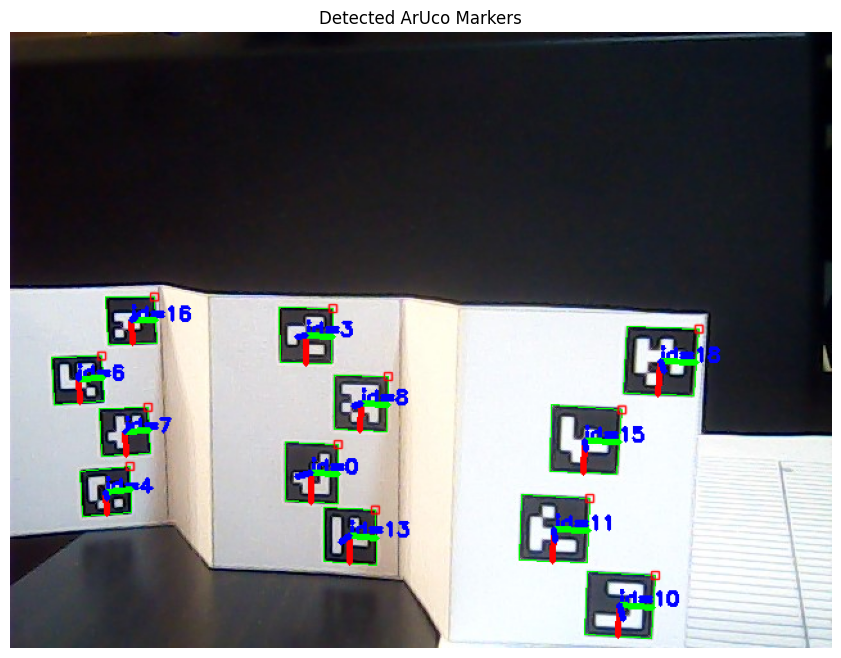

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Загружаем изображение
uploaded = files.upload()
image_filename = list(uploaded.keys())[0]
image = cv2.imread(image_filename)

# Параметры камеры (нужно заменить на реальные после калибровки)
fx = 800
fy = 800
cx = image.shape[1] / 2
cy = image.shape[0] / 2

camera_matrix = np.array([[fx, 0, cx],
                          [0, fy, cy],
                          [0, 0, 1]], dtype=np.float32)

# Предполагаем отсутствие дисторсии
dist_coeffs = np.zeros((4, 1))

marker_size = 0.1  # размер маркера в метрах

# Создаем детектор ArUco
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_250)
parameters = cv2.aruco.DetectorParameters()
detector = cv2.aruco.ArucoDetector(aruco_dict, parameters)

# Детектируем маркеры
corners, ids, rejectedImgPoints = detector.detectMarkers(image)

if ids is not None:
    # Рисуем обнаруженные маркеры
    output_image = image.copy()
    cv2.aruco.drawDetectedMarkers(output_image, corners, ids)

    print(f"Обнаружено маркеров: {len(ids)}")

    # Оцениваем позу для каждого маркера используя solvePnP
    rvecs = []
    tvecs = []

    # Определяем 3D точки маркера в его собственной системе координат
    obj_points = np.zeros((4, 3), dtype=np.float32)
    obj_points[0] = [-marker_size/2, marker_size/2, 0]   # верхний левый
    obj_points[1] = [marker_size/2, marker_size/2, 0]    # верхний правый
    obj_points[2] = [marker_size/2, -marker_size/2, 0]   # нижний правый
    obj_points[3] = [-marker_size/2, -marker_size/2, 0]  # нижний левый

    for i, corner in enumerate(corners):
        # Используем solvePnP для оценки позы
        success, rvec, tvec = cv2.solvePnP(
            obj_points,
            corner[0].astype(np.float32),
            camera_matrix,
            dist_coeffs,
            flags=cv2.SOLVEPNP_IPPE_SQUARE  # оптимально для ArUco маркеров
        )

        if success:
            rvecs.append(rvec)
            tvecs.append(tvec)

            # Рисуем оси координат
            cv2.drawFrameAxes(output_image, camera_matrix, dist_coeffs, rvec, tvec, marker_size/2)

            # Вычисляем расстояние
            distance = np.linalg.norm(tvec)
            print(f'Marker ID: {ids[i][0]}, Distance: {distance:.2f} метров')
            print(f'  Position: X={tvec[0][0]:.3f}, Y={tvec[1][0]:.3f}, Z={tvec[2][0]:.3f} метров')
        else:
            print(f'Не удалось оценить позу для маркера ID: {ids[i][0]}')

    # Отображаем результат
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.title('Detected ArUco Markers')
    plt.axis('off')
    plt.show()

else:
    print("Маркеры не обнаружены!")

In [ ]:
from google.colab import files
uploaded = files.upload()

import cv2
import numpy as np
import matplotlib.pyplot as plt

focal_length = 800  # Фокусное расстояние в пикселях
marker_length = 0.025  # Длина стороны маркера в метрах

image_path = list(uploaded.keys())[0]
frame = cv2.imread(image_path)

aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_4X4_250)
parameters = cv2.aruco.DetectorParameters_create()

corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(frame, aruco_dict, parameters=parameters)

if ids is not None:
    cv2.aruco.drawDetectedMarkers(frame, corners, ids)
    for i in range(len(ids)):
        corner = corners[i][0]
        width = np.linalg.norm(corner[0] - corner[1])
        distance = (marker_length * focal_length) / width
        print(f"Distance to marker {ids[i][0]}: {distance:.2f} meters")

frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame_rgb)
plt.axis('off')
plt.show()


Saving 165.jpg to 165 (2).jpg


AttributeError: module 'cv2.aruco' has no attribute 'Dictionary_get'